In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import hstack

from scipy import sparse
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
x_train_tf = np.load('feature_extraction/X_train_tf.npy', allow_pickle=True)
x_test_tf = np.load('feature_extraction/X_test_tf.npy', allow_pickle=True)

y_train = np.load('feature_extraction/y_train.npy', allow_pickle=True)
y_test = np.load('feature_extraction/y_test.npy', allow_pickle=True)

In [3]:
x_train_tf[0]= x_train_tf[0].toarray()

In [4]:
param_grid_lr = {
    'C': [1, 30, 50, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

param_grid_rf = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 3, 5, 8, 10, 20],
    'criterion': ['gini', 'entropy']
}


param_grid_nb = {
    'alpha': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.5, 1.0]
}


param_grid_dt = {
    'max_depth': [None,100, 120,150],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],  
    'weights': ['uniform', 'distance']  
}

param_grid_gb = {
    'n_estimators': [50, 100, 200, 500],  
    'learning_rate': [1, 0.1, 0.01, 0.001]
}


param_grid_svm = { 
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

In [5]:
lr = LogisticRegression(random_state=42,max_iter=10000)
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
svm = SVC(random_state=42)

In [6]:
best_params_dict = {}
best_models_dict = {}

# Loop over the models and perform grid search
models = [('LR', lr, param_grid_lr),('RF', rf, param_grid_rf), ('DT', dt, param_grid_dt), ('KNN', knn, param_grid_knn),('NB', nb, param_grid_nb),('GB', gb, param_grid_gb)]


In [ ]:
for model_name, model, param_grid in models:
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)
    grid_search.fit(x_train_tf[0], y_train)  
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    best_params_dict[model_name] = best_params
    best_models_dict[model_name] = best_model
    
    print("Best parameters for", model_name, ":", best_params)

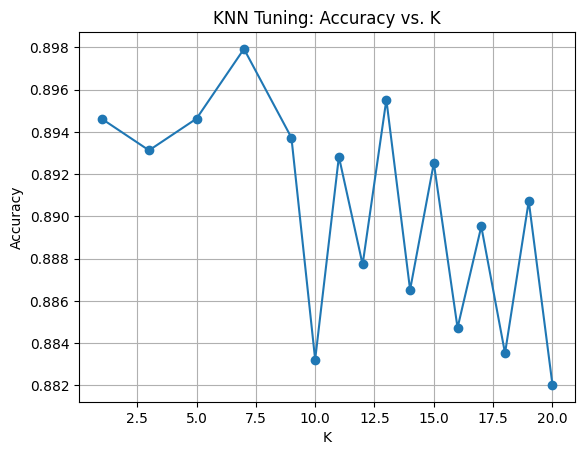

In [11]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the range of K values to try
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,13,14,15]

# Initialize lists to store K values and accuracy scores
k_list = []
accuracy_list = []

# Iterate over the K values
for k in k_values:
    # Create and fit the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_tf[0], y_train)
    
    # Predict on the test data
    y_pred = knn.predict(x_test_tf[0])
    
    # Calculate accuracy score
    acc = accuracy_score(y_test, y_pred)
    
    # Store K value and accuracy score
    k_list.append(k)
    accuracy_list.append(acc)

# Plot the graph
plt.plot(k_list, accuracy_list, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN Tuning: Accuracy vs. K')
plt.grid(True)
plt.show()


In [ ]:
joblib.dump(best_params_dict, 'best_params_dict.pkl')
joblib.dump(best_models_dict, 'best_models_dict.pkl')

In [ ]:
results_df = pd.DataFrame.from_dict(best_params_dict, orient='index')
results_df.to_csv('grid_search_results.csv', index)